# Timing and profiling code

In this chapter, we have learned how to gather and compare runtimes between different coding approaches. We have practiced using the line_profiler and memory_profiler packages to profile your code base and spot bottlenecks. Then, we put our learnings to practice by replacing these bottlenecks with efficient Python code.
#### Syllabus
- Examining runtime
- Using %timeit: your turn!
- Using %timeit: specifying number of runs and loops
- Using %timeit: formal name or literal syntax
- Using cell magic mode (%%timeit)
- Code profiling for runtime
- Pop quiz: steps for using %lprun
- Using %lprun: spot bottlenecks
- Using %lprun: fix the bottleneck
- Code profiling for memory usage
- Pop quiz: steps for using %mprun
- Using %mprun: Hero BMI
- Using %mprun: Hero BMI 2.0
- Bringing it all together: Star Wars profiling


### Simple Method
- Magic command `%timeit -r num_runs -n num_loops` gives time of one line
- `%%timeit` for variable number of lines


In [1]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

In [7]:
import numpy as np
%timeit -r 2 -n 10 np.random.randint(2)+2

7.95 µs ± 3.67 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)


In [12]:
%%timeit 
x = np.random.randint(2)+2
x**2

3.85 µs ± 143 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Using %timeit: Practice!
You'd like to create a list of integers from 0 to 50 using the range() function. However, you are unsure whether using list comprehension or unpacking the range object into a list is faster. Let's use %timeit to find the best implementation.

For your convenience, a reference table of time orders of magnitude is provided below (faster at the top).

|symbol|	name|	unit (s)|
| ------------- |:-------------:| -----:|
|ns|	nanosecond|	10-9|
|µs| (us)|	microsecond|	10-6|
|ms|	millisecond|	10-3|
|s|	second	|100|

Use list comprehension and range() to create a list of integers from 0 to 50 called nums_list_comp.

In [14]:
# Create a list of integers (0-50) using list comprehension
%timeit nums_list_comp = [num for num in range(51)]
print(nums_list_comp)

# Create a list of integers (0-50) by unpacking range
%timeit nums_unpack = [*range(51)]
print(nums_unpack)

1.82 µs ± 78.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
513 ns ± 10.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


A list of 480 superheroes has been loaded into your session (called heroes). You'd like to analyze the runtime for converting this heroes list into a set. Instead of relying on the default settings for %timeit, you'd like to only use 5 runs and 25 loops per each run.

In [17]:
nums = range(480)
%timeit -r5 -n25 set(nums)

21.4 µs ± 6.43 µs per loop (mean ± std. dev. of 5 runs, 25 loops each)


Using `%timeit`: formal name or literal syntax
Python allows you to create data structures using either a formal name or a literal syntax. In this exercise, you'll explore how using a literal syntax for creating a data structure can speed up runtimes.

|data structure|	formal name|	literal syntax|
| ------------- |:-------------:| -----:|
|list           |	list()      |	[]|
|dictionary|	dict()|	{}|
|tuple|	tuple()|	()|

In [19]:
# Create a list using the formal name
%timeit formal_list = list()

# Create a list using the literal syntax
%timeit literal_list = []


116 ns ± 3.39 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
27.2 ns ± 3.45 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


Using cell magic mode (%%timeit)
From here on out, you'll be working with a superheroes dataset. For this exercise, a list of each hero's weight in kilograms (called wts) is loaded into your session. You'd like to convert these weights into pounds.

You could accomplish this using the below for loop:

```python
hero_wts_lbs = []
for wt in wts:
    hero_wts_lbs.append(wt * 2.20462)
```
Or you could use a numpy array to accomplish this task:

```python
wts_np = np.array(wts)
hero_wts_lbs_np = wts_np * 2.20462
```
Use %%timeit in your IPython console to compare runtimes between these two approaches. Make sure to press SHIFT+ENTER after the magic command to add a new line before writing the code you wish to time. After you've finished coding, answer the following question:

Which of the above techniques is faster?

In [ ]:
wts = range(1000)

In [24]:
%%timeit
hero_wts_lbs = []
for wt in wts:
    hero_wts_lbs.append(wt * 2.20462)



138 µs ± 4.78 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [25]:
%%timeit
wts_np = np.array(wts)
hero_wts_lbs_np = wts_np * 2.20462

98.5 µs ± 2.78 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Code Profiling for Runtime
- line by line analysis
- install
`%pip install line-profiler`

- to get line by line analysis of code
```python
%load_ext line_profiler
%lprun -f function function(args)
```

#### Using %lprun: spot bottlenecks
Profiling a function allows you to dig deeper into the function's source code and potentially spot bottlenecks. When you see certain lines of code taking up the majority of the function's runtime, it is an indication that you may want to deploy a different, more efficient technique.

Lets dig deeper into the convert_units() function.

def convert_units(heroes, heights, weights):
```python
    new_hts = [ht * 0.39370  for ht in heights]
    new_wts = [wt * 2.20462  for wt in weights]

    hero_data = {}

    for i,hero in enumerate(heroes):
        hero_data[hero] = (new_hts[i], new_wts[i])

    return hero_data
```

Load the line_profiler package into your IPython session. Then, use `%lprun` to profile the `convert_units()` function acting on your superheroes data. Remember to use the special syntax for working with `%lpru`n (you'll have to provide a -f flag specifying the function you'd like to profile).

The `convert_units()` function, heroes list, hts array, and wts array have been loaded into your session. After you've finished coding, answer the following question:

**What percentage of time is spent on the new_hts list comprehension line of code relative to the total amount of time spent in the `convert_units()` function?**

In [1]:
%load_ext line_profiler

In [8]:
import pickle
# load data for the use
with open("data/heros.txt", "rb") as fp:   # Unpickling
    heroes = pickle.load(fp)

with open("data/wts.txt", "rb") as fp:   # Unpickling
    wts = pickle.load(fp)

with open("data/hts.txt", "rb") as fp:   # Unpickling
    hts = pickle.load(fp)    

In [5]:
def convert_units(heroes, heights, weights):

    new_hts = [ht * 0.39370  for ht in heights]
    new_wts = [wt * 2.20462  for wt in weights]

    hero_data = {}

    for i,hero in enumerate(heroes):
        hero_data[hero] = (new_hts[i], new_wts[i])

    return hero_data


In [6]:
%lprun -f convert_units convert_units(heroes, hts, wts)

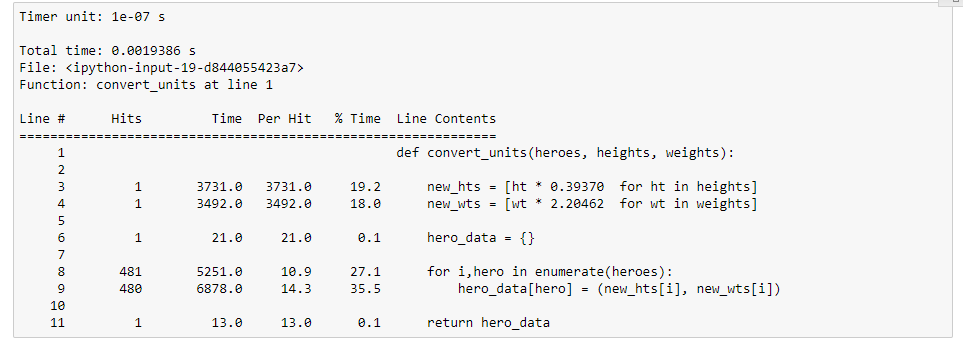

### Using %lprun: fix the bottleneck


In the previous exercise, you profiled the convert_units() function and saw that the new_hts list comprehension could be a potential bottleneck. Did you notice that the new_wts list comprehension also accounted for a similar percentage of the runtime? This is an indication that you may want to create the new_hts and new_wts objects using a different technique.

Since the height and weight of each hero is stored in a numpy array, you can use array broadcasting rather than list comprehension to convert the heights and weights. This has been implemented in the below function:
```python
def convert_units_broadcast(heroes, heights, weights):

    # Array broadcasting instead of list comprehension
    new_hts = heights * 0.39370
    new_wts = weights * 2.20462

    hero_data = {}

    for i,hero in enumerate(heroes):
        hero_data[hero] = (new_hts[i], new_wts[i])

    return hero_data
```
Load the line_profiler package into your IPython session. Then, use `%lprun` to profile the `convert_units_broadcast()` function acting on your superheroes data. The `convert_units_broadcast()` function, heroes list, hts array, and wts array have been loaded into your session. After you've finished coding, answer the following question:

What percentage of time is spent on the new_hts array broadcasting line of code relative to the total amount of time spent in the `convert_units_broadcast()` function?

In [22]:
def convert_units_broadcast(heroes, heights, weights):

    # Array broadcasting instead of list comprehension
    new_hts = heights * 0.39370
    new_wts = weights * 2.20462

    hero_data = {}

    for i,hero in enumerate(heroes):
        hero_data[hero] = (new_hts[i], new_wts[i])

    return hero_data
%lprun -f convert_units convert_units(heroes, hts, wts)

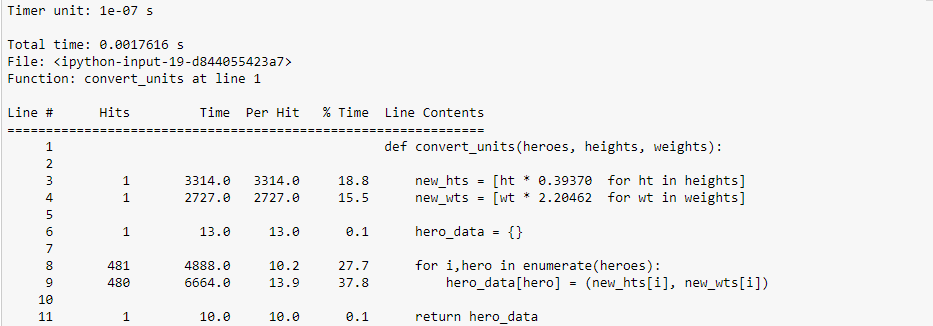

## Code Profiling for Runtime
- get memoery usage 
- use sys.getsizeof(nun...)
- **mprun can only be used in a file**
- for line-by-line analysis for meomory profiler
`pip install memory_profiler`

- simple use

```python
%load_ext meomry_profiler
%mprun -f function function(args)
```

In [9]:
# load data for the use

import pickle
with open("data/heros.txt", "rb") as fp:   # Unpickling
    heroes = pickle.load(fp)

with open("data/wts.txt", "rb") as fp:   # Unpickling
    wts = pickle.load(fp)

with open("data/hts.txt", "rb") as fp:   # Unpickling
    hts = pickle.load(fp)    

In [10]:
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [11]:
from function import convert_units_broadcast
%mprun -f convert_units_broadcast convert_units_broadcast(heroes, hts, wts)
%mprun -f convert_units_broadcast convert_units_broadcast(heroes, hts, wts)

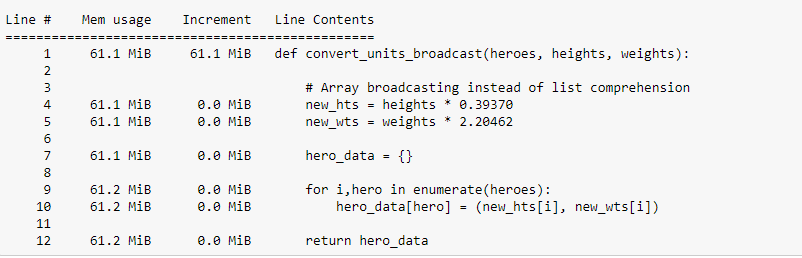

### Using `%mprun`: Hero BMI
You'd like to calculate the body mass index (BMI) for a selected sample of heroes. BMI can be calculated using the below formula:

$$BMI = \dfrac{mass(kg)}{height(m)^2}$$

A random sample of 25,000 superheroes has been loaded into your session as an array called sample_indices. This sample is a list of indices that corresponds to each superhero's index selected from the heroes list.

A function named calc_bmi_lists has also been created and saved to a file titled bmi_lists.py. For convenience, it is displayed below:
```python
def calc_bmi_lists(sample_indices, hts, wts):

    # Gather sample heights and weights as lists
    s_hts = [hts[i] for i in sample_indices]
    s_wts = [wts[i] for i in sample_indices]

    # Convert heights from cm to m and square with list comprehension
    s_hts_m_sqr = [(ht / 100) ** 2 for ht in s_hts]

    # Calculate BMIs as a list with list comprehension
    bmis = [s_wts[i] / s_hts_m_sqr[i] for i in range(len(sample_indices))]

    return bmis
```
Notice that this function performs all necessary calculations using list comprehension (hence the name `calc_bmi_lists())`. Dig deeper into this function and analyze the memory footprint for performing your calculations using lists:

Load the memory_profiler package into your IPython session.
`Import calc_bmi_lists from bmi_lists`.
Once you've completed the above steps, use %mprun to profile the `calc_bmi_lists()` function acting on your superheroes data. The hts array and wts array have already been loaded into your session.
After you've finished coding, answer the following question:

How much memory do the list comprehension lines of code consume in the `calc_bmi_lists()` function? (i.e., what is the total sum of the Increment column for these four lines of code?)

In [1]:
# load data for the use

import pickle
with open("data/heros.txt", "rb") as fp:   # Unpickling
    heroes = pickle.load(fp)

with open("data/wts.txt", "rb") as fp:   # Unpickling
    wts = pickle.load(fp)

with open("data/hts.txt", "rb") as fp:   # Unpickling
    hts = pickle.load(fp)



In [2]:
%load_ext memory_profiler

In [14]:
from function import calc_bmi_lists

sample_indices = range(len(heroes))
%mprun -f calc_bmi_lists calc_bmi_lists(sample_indices, hts, wts)

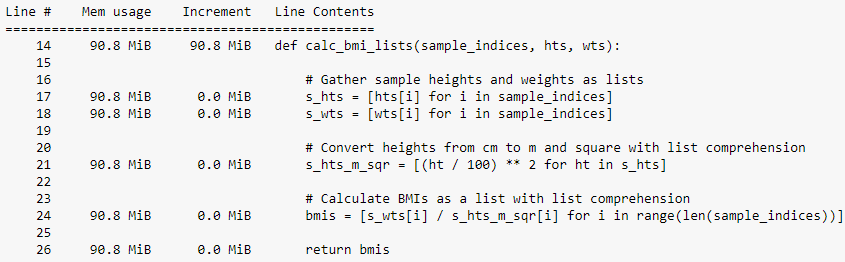

### Using %mprun: Hero BMI 2.0
Let's see if using a different approach to calculate the BMIs can save some memory. If you remember, each hero's height and weight is stored in a numpy array. That means you can use NumPy's handy array indexing capabilities and broadcasting to perform your calculations. A function named calc_bmi_arrays has been created and saved to a file titled bmi_arrays.py. For convenience, it is displayed below:
```python
def calc_bmi_arrays(sample_indices, hts, wts):

    # Gather sample heights and weights as arrays
    s_hts = hts[sample_indices]
    s_wts = wts[sample_indices]

    # Convert heights from cm to m and square with broadcasting
    s_hts_m_sqr = (s_hts / 100) ** 2

    # Calculate BMIs as an array using broadcasting
    bmis = s_wts / s_hts_m_sqr

    return bmis
```
Notice that this function performs all necessary calculations using arrays.

Let's see if this updated array approach decreases your memory footprint:

Load the `memory_profiler` package into your IPython session.
Import calc_bmi_arrays from bmi_arrays.

Once you've completed the above steps, use `%mprun` to profile the `calc_bmi_arrays()` function acting on your superheroes data. The sample_indices array, hts array, and wts array have been loaded into your session.

In [4]:
from function import calc_bmi_arrays

sample_indices = range(len(heroes))
%mprun -f calc_bmi_arrays calc_bmi_arrays(sample_indices, hts, wts)

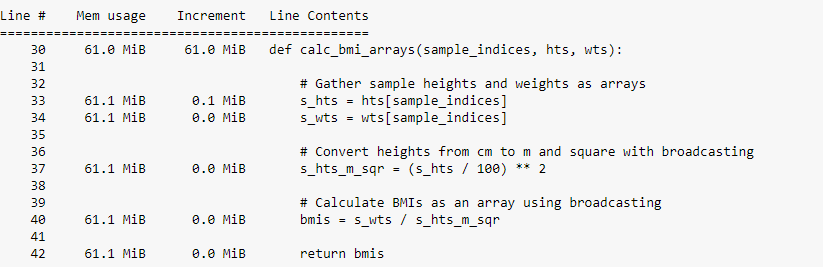

### Bringing it all together: Star Wars profiling
A list of 480 superheroes has been loaded into your session (called `heroes`) as well as a list of each hero's corresponding publisher (called `publishers`).

You'd like to filter the heroes list based on a hero's specific publisher, but are unsure which of the below functions is more efficient.
```python
def get_publisher_heroes(heroes, publishers, desired_publisher):

    desired_heroes = []

    for i,pub in enumerate(publishers):
        if pub == desired_publisher:
            desired_heroes.append(heroes[i])

    return desired_heroes
def get_publisher_heroes_np(heroes, publishers, desired_publisher):

    heroes_np = np.array(heroes)
    pubs_np = np.array(publishers)

    desired_heroes = heroes_np[pubs_np == desired_publisher]

    return desired_heroes
```

In [1]:
from function import get_publisher_heroes, get_publisher_heroes_np
import numpy as np

In [2]:
# load data for the use

import pickle
with open("data/heroes1.txt", "rb") as fp:   # Unpickling
    heroes1 = pickle.load(fp)

with open("data/publishers.txt", "rb") as fp:   # Unpickling
    publishers = pickle.load(fp)

Use the get_publisher_heroes() function and the get_publisher_heroes_np() function to collect heroes from the Star Wars universe. The desired_publisher for Star Wars is 'George Lucas'.

In [3]:
get_publisher_heroes(heroes1, publishers, 'George Lucas')
get_publisher_heroes_np(heroes1, publishers, 'George Lucas')

array(['Darth Vader', 'Han Solo', 'Luke Skywalker', 'Yoda'], dtype='<U18')

Within your IPython console, load the line_profiler and use %lprun to profile the two functions for line-by-line runtime. When using %lprun, use each function to gather the Star Wars heroes as you did in the previous step. After you've finished profiling, answer the following question: Which function has the fastest runtime?

In [10]:
%load_ext line_profiler
%lprun -f get_publisher_heroes get_publisher_heroes(heroes1, publishers, "George Lucas")

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [11]:
%lprun -f get_publisher_heroes_np get_publisher_heroes_np(heroes1, publishers, "George Lucas")

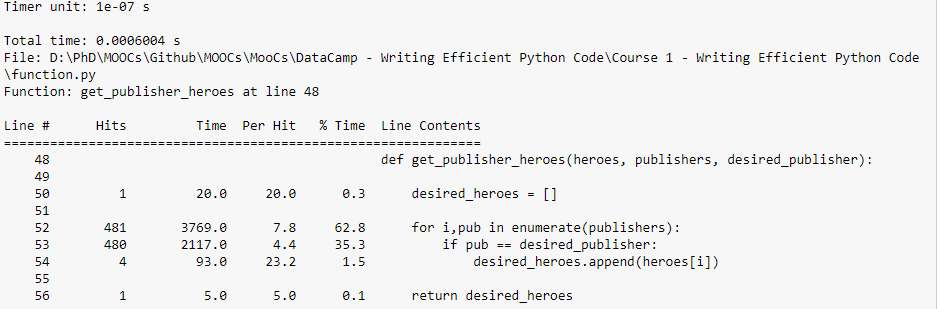


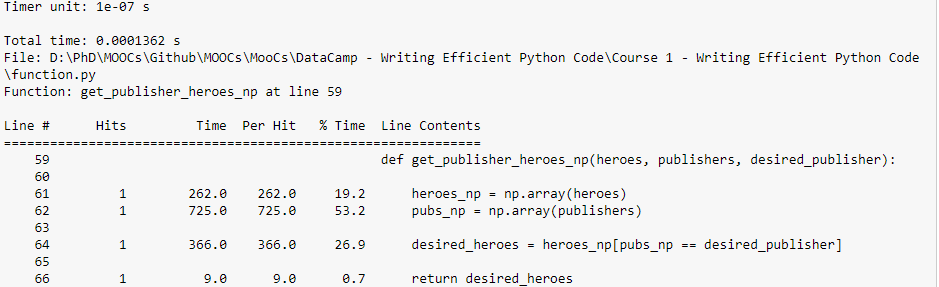

np is faster.

In [14]:
%load_ext memory_profiler
%mprun -f get_publisher_heroes get_publisher_heroes(heroes1, publishers, "George Lucas")

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler



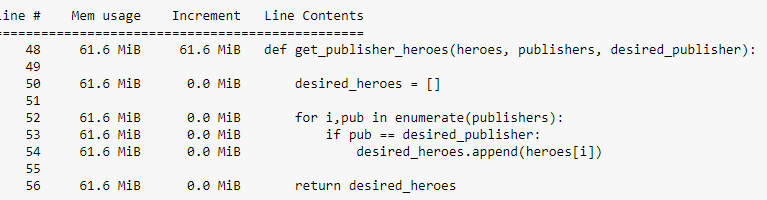

In [16]:
%mprun -f get_publisher_heroes get_publisher_heroes_np(heroes1, publishers, "George Lucas")

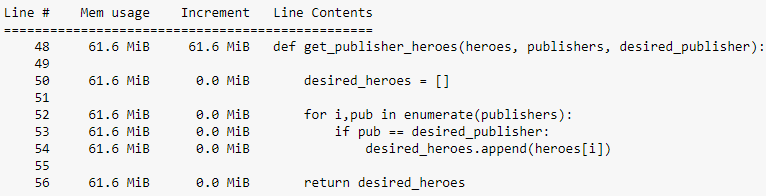

Around same memory usage.